## **Data overview**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import re #pattern searching in a string

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

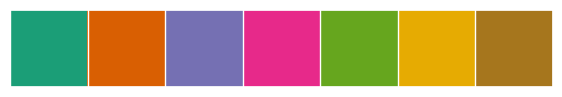

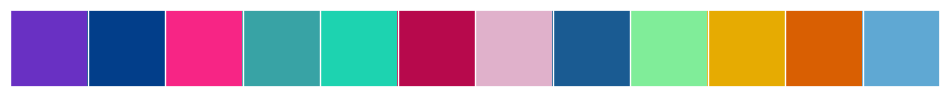

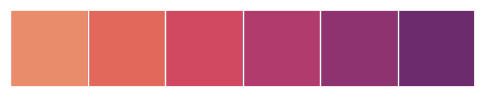

In [2]:
qual_colors1 = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']
qual_colors1 = sns.color_palette(sns.color_palette(qual_colors1))
sns.palplot(qual_colors1)

qual_colors2 = ['#6930c3','#023e8a','#F72585','#38a3a5','#1dd3b0','#b7094c','#e0b1cb','#1a5b92','#80ed99','#e6ab02','#d95f02','#5fa8d3']
qual_colors2 = sns.color_palette(sns.color_palette(qual_colors2))
sns.palplot(qual_colors2)

num_pal = sns.color_palette("flare")
sns.palplot(num_pal)

In [17]:
df18 = pd.read_csv('C:/Users/PC/Desktop/Prethesis/data_csv/data_2018.csv', parse_dates=['transaction_date'])
df19 = pd.read_csv('C:/Users/PC/Desktop/Prethesis/data_csv/data_2019.csv', parse_dates=['transaction_date'])
df20 = pd.read_csv('C:/Users/PC/Desktop/Prethesis/data_csv/data_2020.csv', parse_dates=['transaction_date'])
df21 = pd.read_csv('C:/Users/PC/Desktop/Prethesis/data_csv/data_2021.csv', parse_dates=['transaction_date'])
df22 = pd.read_csv('C:/Users/PC/Desktop/Prethesis/data_csv/data_2022.csv', parse_dates=['transaction_date'])


In [19]:
total = pd.concat([df18,df19,df20,df21,df22],axis=0)
print(total.shape)
total.sample(5)

(8454383, 12)


,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year
1604589,515414488,728389119,2252.6086,0.0,2022-05-26,MSH ITMSH04068 Slim SS Navy M,MSH ITMSH04068 Slim SS Navy M,NOT-CAPTURED,NOT-CAPTURED,South,South_7464,2022
466179,338518025,409355667,1499.0000,0.0,2018-09-17,MSO ITMSO00038 Slim FF Rust 32,MENS SHORTS,Rust,32,North,North_7155,2018
25562,397981128,385183432,1638.7874,0.0,2018-05-24,ITMTR00013,Mens Trouser - Sportswear,Stone,32,East,East_7096,2018
827182,35855458,653003982,1299.0000,0.0,2021-10-08,BTS ITBTS00399 Regular SS Cobalt M,BTS ITBTS00399 Regular SS Cobalt M,Cobalt,M,South,South_7407,2021
1530585,441026085,656936922,2399.0000,0.0,2021-10-24,MSH ITMSH03292 Slim LS Pine M,MSH ITMSH03292 Slim LS Pine M,NOT-CAPTURED,NOT-CAPTURED,South,South_7254,2021


In [20]:
def find_nan(df):
    columns = df.columns
    col_values = total.isna().sum().values
    temp = pd.DataFrame(data=col_values,index=columns,columns=['missing_count'])
    temp['percent_missing'] = np.round((temp['missing_count'] / total.shape[0]) *100 ,2)
    return temp

find_nan(total)

,missing_count,percent_missing
user_id,0,0.00
bill_id,0,0.00
line_item_amount,0,0.00
bill_discount,0,0.00
transaction_date,0,0.00
description,17,0.00
inventory_category,697444,8.25
colour,15555,0.18
size,15555,0.18
zone_name,0,0.00


In [21]:
# extract weekday and month from transaction date
total['month'] = total['transaction_date'].dt.month_name()
total['weekday'] = total['transaction_date'].dt.day_name()
total.sample(2)

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,month,weekday
1000949,392081251,369602121,1499.0,0.0,2018-02-27,ITMTS00054,Mens T-Shirt - Sportswear,Denim Blue,S,East,East_6510,2018,February,Tuesday
32628,492233857,643275909,2069.1,0.0,2021-08-25,MSH ITMSH03152 SLIM LS Teal Ind M,NaN,Teal Ind,M,North,North_7301,2021,August,Wednesday


In [22]:
total.head()

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,month,weekday
0,403252497,401641461,1049.5,0.0,2018-08-11,TR ITA14TRK010 FF BROOKLYN STRAIGHT Beige 44 /...,TROUSER,Beige,44 / 112CM,East,East_7096,2018,August,Saturday
1,357000026,397716483,659.4,0.0,2018-07-22,MB ITA14BLT016 35MM NA Olive Green 32 /,MB ITA14BLT016 35MM NA Olive Green 32 - 97CM,OLIVE GREEN,32 / 97CM,North,North_7018,2018,July,Sunday
2,372773935,362298787,1899.0,0.0,2018-01-12,TR S15-NELSON FF KANSAS Tan 36 / 92CM,TROUSER,Tan,36 / 92CM,North,North_6505,2018,January,Friday
3,362714910,360637282,1799.0,0.0,2018-01-03,TR S15-BRANDON FF KANSAS Khaki 32 / 82CM,TROUSER,Khaki,32 / 82CM,North,North_6505,2018,January,Wednesday
4,393891557,374396867,1299.0,0.0,2018-03-29,MB ITA15BLT004 40MM NA Reddish Brown 38 / 112CM,ITA15BLT004-40MM,REDDISH BROWN,38 / 112CM,East,East_7310,2018,March,Thursday


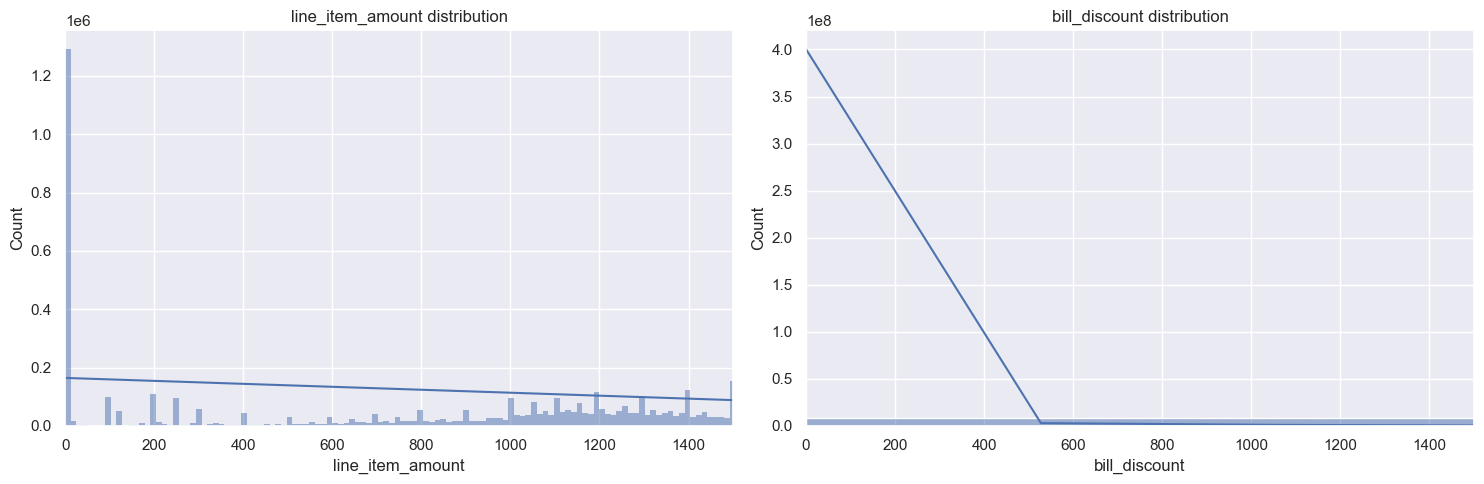

In [23]:
# numerical features distribution
fig , ax = plt.subplots(1,2,figsize=(15,5))
for i,col in enumerate(['line_item_amount','bill_discount']):
    sns.histplot(data=total,x=col,kde=True,ax=ax[i])
    ax[i].set_xlim([0,1500])
    ax[i].set_xlabel(col)
    ax[i].set_title(f'{col} distribution')

fig.tight_layout()
plt.show()

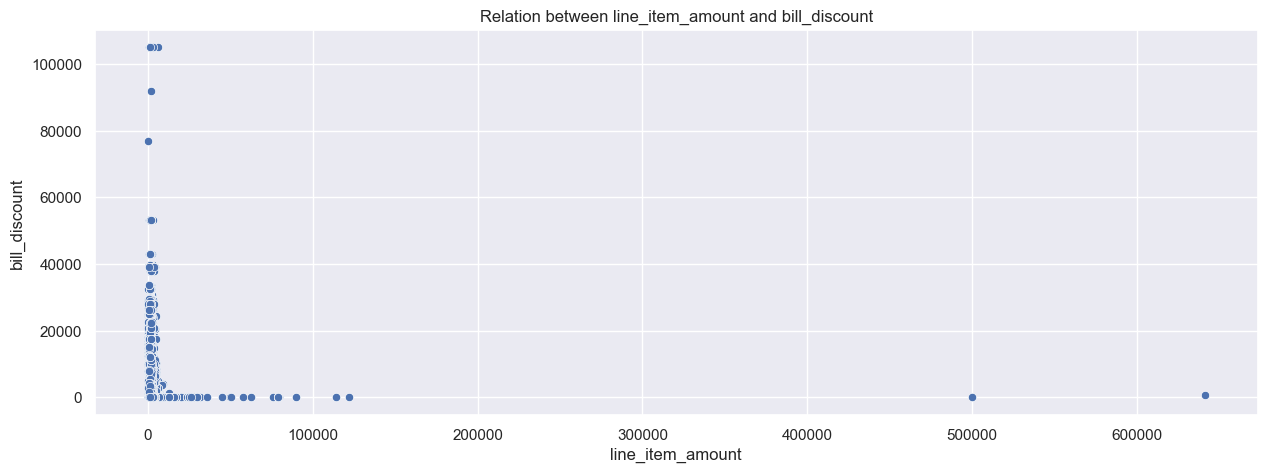

In [24]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=total,x='line_item_amount',y='bill_discount')
plt.title('Relation between line_item_amount and bill_discount')
plt.show()

## **Data Cleaning and FE**

In [25]:
def get_product(txt,pattern):
    if isinstance(txt, str):

        #search and check if split word exists
        searched_word = re.search(pattern, txt)

        #word exists
        if searched_word:
            splitted_string = re.split(pattern, txt)[0]
            # check if empty list is returned->when there is only pattern available in 'txt'
            if splitted_string == '':
                return 'Unknown'
            else:
                return splitted_string.strip()

        #split word not exists(but the product name can still be present , so we'll need the entire string)
        else:
            return txt

    # any other value found other than string datatype
    else:
        return 'Unknown'

total['desc_copy'] = total['description'].copy()
total['desc_copy'] = total['desc_copy'].fillna('Unknown')

#for patterns starting with IT,CORE-, A16-,A17-,S16-,S18-,TBA07SD7890(LENGTH=11)
total[['product']] = total[['desc_copy']].applymap(lambda row:get_product(row,pattern=r'IT[A-Z0-9]+|CORE-|\b[A-Z]\d{2}-|\b[A-Z0-9]{11}\b'))

#product names are acronyms are their lengths are not greater than 2.
total[['product']] = total[['product']].applymap(lambda row: 'Unknown' if len(row.split())>=2 else row)

#removing inconsistent data
total[['product']] = total[['product']].applymap(lambda row: 'Unknown' if re.search(r'\d+|size|name|bill|amount|quantity|email|address|number|city|state|country|code|customer|discount|sex', row,flags=re.IGNORECASE) else row)

In [26]:
# removing more inconsistent data
invalid_vals = ['CALandLine', 'CAMobile', 'Cashier','PendingOrders','DOB', 'DOA', 'LastVisit', 'Points',
'Anniversary', 'CashierMBO','OrderCashier','CreditLimit',
'DateOfAnniversary', 'OtherDetails', 'IsReminderRequired',
'AgreeToReceiveSMS', 'Gender', 'AwarenessSourceRemarks',
'AllowCredit', 'CreditDays', 'AgreeToReceiveCall', 'DateOfBirth','Administrator','MRPValue','CGST', 'BatchDescription',
'TaxDescription', 'IsActive', 'CardExpiryDate','DealerType','DND','DEFAULT']

total[['product']] = total[['product']].applymap(lambda val: 'Unknown' if val in invalid_vals else val)

In [27]:
total['ic_copy'] = total['inventory_category'].copy()
total['ic_copy'] = total['ic_copy'].fillna('Unknown')
total[['ic_copy']] = total[['ic_copy']].applymap(lambda row: re.sub(r'na','',row,flags=re.IGNORECASE))

total['colour'] = total['colour'].fillna('Unknown')
total['colour'] = total['colour'].str.replace('NOT-CAPTURED','Unknown')

total['size'] = total['size'].fillna('Unknown')
total['size'] = total['size'].str.replace('NOT-CAPTURED','Unknown')

In [28]:
## IDENTIFYING COLOURS
all_colours = total['colour'].value_counts().index.tolist()
pattern = r'\b(?:' + '|'.join(re.escape(color)  for color in all_colours if isinstance(color,str)) + r')\b'

def find(txt,pattern):
    x = re.findall(pattern, txt,flags=re.IGNORECASE)
    if x==[]:
        return ('Unknown')
    return ' '.join(x)

print('Unique colours count before:',len(total['colour'].unique()))

unknown_colours_bef = total[total['colour']=='Unknown'].shape[0]
total.loc[(total['colour']=='Unknown'),'colour'] = total.loc[(total['colour']=='Unknown'),'ic_copy'].map(lambda row: find(row,pattern))
unknown_colours_after = total[total['colour']=='Unknown'].shape[0]
print('Colours found: ',unknown_colours_bef - unknown_colours_after)

print('Unique colours count after:',len(total['colour'].unique()))

Unique colours count before: 402
Colours found:  2331166
Unique colours count after: 457


In [29]:
# colours with highest sales
highest_sales_colours = total[total['colour']!='Unknown'].groupby(['colour'])['line_item_amount'].median().sort_values(ascending=False)
highest_sales_colours[:20]

colour
Light Brown      5099.0000
Deep Grey        4499.2500
Teal+Choco       3999.0000
Fawn             3599.4000
Military         3599.4000
Blk+White        3119.4000
Navy+Choco       3119.4000
Silky            3082.8486
Slvr Grey        2969.0410
Denim            2786.7250
Olive Camo       2699.4000
Black Matt       2699.4000
Navy Camo        2699.4000
Burgandy         2699.0000
Black Mel        2619.2289
Midnight         2617.1702
Vintage Khaki    2599.0000
Sand Stone       2545.2908
Camel            2499.5000
Dk Brown         2499.0000
Name: line_item_amount, dtype: float64

In [30]:
## IDENTIFYING SIZE
all_size = total['size'].unique().tolist()
pattern = r'\b(?:' + '|'.join(re.escape(size) for size in all_size if isinstance(size,str)) + r')\b'

print('Unique size count before:',len(total['size'].unique()))

unknown_size_bef = total[total['size']=='Unknown'].shape[0]
total.loc[(total['size']=='Unknown'),'size'] = total.loc[(total['size']=='Unknown'),'ic_copy'].map(lambda row: find(row,pattern))
total.loc[(total['size']=='Unknown'),'size'] = total.loc[(total['size']=='Unknown'),'ic_copy'].map(lambda row: find(row,r'\d*x\d*x\d*|\d*mm|\d*cm|\d*m'))
unknown_size_after = total[total['size']=='Unknown'].shape[0]
print('Sizes found: ',unknown_size_bef - unknown_size_after)

print('Unique size count after:',len(total['size'].unique()))

Unique size count before: 68
Sizes found:  2559280
Unique size count after: 129


In [31]:
def find_size(txt,pattern):
    try:

        x = re.findall(pattern,txt,flags=re.IGNORECASE)
        if x==[]:
            return ('Unknown')

        x =  ', '.join(x)
        if x != '':
            return (txt.split(x)[1])
    except:
        return 'Unknown'

print('Unique sizes before:',len(total['size'].unique()))

unknown_size_bef = total[total['size']=='Unknown'].shape[0]
total.loc[(total['size']=='Unknown'),'size'] = total.loc[(total['size']=='Unknown'),'ic_copy'].map(lambda row: find_size(row,r'Size'))
#some rows contains sizes seperated by ( , ) like m,s  which is incorrect as at a time a product can have only 1 size
total[['size']] = total[['size']].applymap(lambda x: x.split(' ')[-1].strip() if ' ' in x else x)
unknown_size_after = total[total['size']=='Unknown'].shape[0]
print('Sizes found: ',unknown_size_bef - unknown_size_after)

print('Unique sizes after:',len(total['size'].unique()))

Unique sizes before: 129
Sizes found:  2146
Unique sizes after: 96


In [32]:
# comman sizes
comman_sizes = total[total['size']!='Unknown'].groupby(['size'])['size'].count().sort_values(ascending=False)
comman_sizes[:10]

size
M          1272218
L          1121393
S           812004
XL          616911
DEFAULT     587851
34          490535
32          407635
36          396651
2XL         358773
12x4x16     279502
Name: size, dtype: int64

In [33]:
replace = {'TR':'MENS TROUSER',
'MSP':'MENS SPORTSCOAT',
'BSP':'MENS SPORTSCOAT',
'TWB': 'MENS TROUSER WITH BELT',
'JKT': 'MENS JACKET',
'SH':'MENS SHIRT',
'MSH':'MENS SHIRT',
'MTR':'MENS TROUSER WITH BELT',
'MBL':'MENS BELT',
'BLT':'MENS BELT',
'SR':'MENS SHORTS',
'MTS':'MENS T-SHIRT',
'TS':'MENS T-SHIRT',
'BSH':'BOYS SHIRT',
'SW':'MENS SWEATER',
'BDE':'BOYS DENIM',
'MFW':'MENS FOOTWEAR',
'FW':'MENS FOOTWEAR',
'BDNM':'BOYS DENIM',
'SX':'MENS SOCKS',
'MSO':'MENS SHORTS',
'SO':'MENS SHORTS',
'MDE':'MENS DENIM',
'BTS':'BOYS T-SHIRT',
'BSO':'BOYS SHORTS',
'MDNM':'MENS DENIM',
'BTR':'BOYS TROUSER',
'MSW':'MENS SWEATER',
'SCKS':'MENS SOCKS',
'MSX':'MENS SOCKS',
'BSW':'BOYS SWEATER',
'MJKT':'MENS JACKET',
'MJA':'MENS JACKET',
'BJKT':'BOYS JACKET',
'BJO':'BOYS Jogger',
'MSC':'MENS JACKET',
'BS':'BOYS SHIRT',
'MWL':'Mens Wallet - Sportswear',
'BJA':'BOYS JACKET',
'BSR':'BOYS SHORTS',
'MDN':'MENS Denim Trouser',
'BDN':'Boys Denim Trouser - Jeanswear',
'KT':'MENS KNIT TROUSER',
'MJGR':'MENS JOGGER',
'TBG':'Trolley Bag',
'CBG':'CARRY BAG',
'MTIE':'MALE TIE',
'MJO':'MENS JOGGER',
'MWC':'MENS BANDI'}

total['product'] = total['product'].map(lambda x: replace[x] if x in replace.keys() else x)

## **Product Analysis**

In [34]:
print(total['line_item_amount'].describe())
print('-'*30)
print(total['bill_discount'].describe())

count    8.454383e+06
mean     1.334790e+03
std      9.843195e+02
min      0.000000e+00
25%      6.990000e+02
50%      1.352693e+03
75%      1.999000e+03
max      6.410010e+05
Name: line_item_amount, dtype: float64
------------------------------
count    8.454383e+06
mean     9.284983e+01
std      8.119705e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.049536e+05
Name: bill_discount, dtype: float64


In [35]:
## products with highest sales
highest_sales_products = total.groupby(['product'])['line_item_amount'].median().sort_values(ascending=False)
highest_sales_products[:10]

product
soap                      50000.0000
MENS SPORTSCOAT            4810.7656
MENS BANDI                 3373.9610
MENS JACKET                3060.1145
MENS Denim Trouser         2499.0000
MENS FOOTWEAR              1999.6000
MENS DENIM                 1999.0000
MENS TROUSER WITH BELT     1954.5580
MENS SHIRT                 1819.3000
MENS SWEATER               1679.4000
Name: line_item_amount, dtype: float64

In [36]:
# most discounted products
highest_discounted_products = total[total['product']!='Unknown'].groupby(['product'])['bill_discount'].median().sort_values(ascending=False)
highest_discounted_products[:5]

product
SHirts          151.85
B                 0.00
MENS SWEATER      0.00
MENS BANDI        0.00
MENS BELT         0.00
Name: bill_discount, dtype: float64

In [37]:
# comman(or most buyed) products
comman_products = total[total['product']!='Unknown'].groupby(['product'])['product'].count().sort_values(ascending=False)
comman_products[:5]

product
MENS SHIRT                2706356
MENS TROUSER WITH BELT    1175228
CARRY BAG                  808099
MENS T-SHIRT               521117
MENS DENIM                 470342
Name: product, dtype: int64

In [38]:
# sales of products with colour
products_with_colour = total[(total['product']!='Unknown')&(total['colour']!='Unknown')].groupby(['product','colour'])['line_item_amount'].median().reset_index().sort_values('line_item_amount',ascending=False)
products_with_colour[:10]

,product,colour,line_item_amount
1100,MENS SPORTSCOAT,Beige,6299.10000
1112,MENS SPORTSCOAT,Lt Grey,6249.00000
1109,MENS SPORTSCOAT,Khaki,5978.52250
741,MENS JACKET,Ink Blue,5858.02880
1117,MENS SPORTSCOAT,Sky,5749.00000
1118,MENS SPORTSCOAT,Wine,5749.00000
1108,MENS SPORTSCOAT,Indigo,5749.00000
745,MENS JACKET,Lt Khaki,5637.78100
1113,MENS SPORTSCOAT,Maroon,5365.10665
1111,MENS SPORTSCOAT,Lt Brown,5264.77830


In [39]:
# highest sales of products with size
products_with_size = total[(total['product']!='Unknown')&(total['size']!='Unknown')].groupby(['product','size'])['line_item_amount'].median().sort_values(ascending=False)
products_with_size[:10]

product          size
MENS SPORTSCOAT  2XL     4983.27150
                 S       4873.83600
                 M       4806.75100
                 L       4798.96000
                 XL      4798.88000
                 3XL     4388.46420
MENS BANDI       S       3446.53660
                 M       3427.55100
                 2XL     3372.90575
                 XL      3353.79170
Name: line_item_amount, dtype: float64

## **Time Analysis**

In [40]:
# What is the total revenue for every year?
total_sales_every_year = total.groupby(['year'])['line_item_amount'].sum()
total_sales_every_year

year
2018    1.900333e+09
2019    2.103860e+09
2020    1.579160e+09
2021    2.302388e+09
2022    3.399087e+09
Name: line_item_amount, dtype: float64

In [41]:
def lineplot(data,x,y,hue,hue_order,title=None,xlabel=None):
    plot = sns.lineplot(data=data,x=x,y=y,markers=True, dashes=True,hue=hue,hue_order=hue_order,style=hue,palette=qual_colors2)
    plt.xlabel(xlabel)
    plt.ylabel(f'{y}')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return plot

def barplot(x,y,data=None,ax=None,order=None,palette=qual_colors2,labelrotation=0,title=None):
    plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
    ax.bar_label(plot1.containers[0])
    ax.set_xlabel('')
    ax.set_ylabel(f'{y}')
    ax.set_title(title)
    ax.tick_params(labelrotation=labelrotation)
    return plot1

C:\Users\PC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


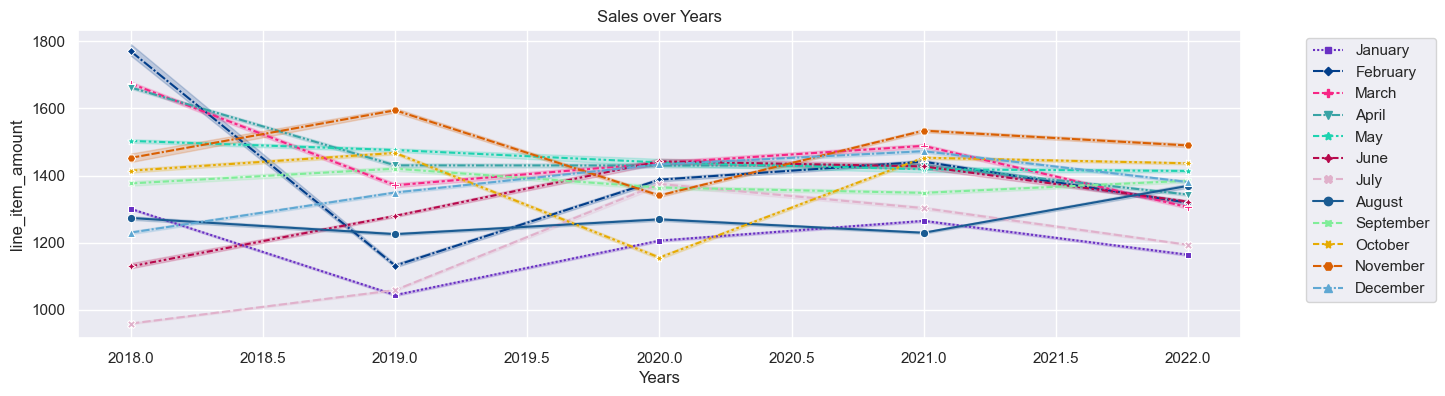

In [42]:
# What are the sales trends over different years or months?
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
fig = plt.figure(figsize=(15,4))
lineplot(data=total,x="year",y='line_item_amount',hue='month',hue_order=month_order,title='Sales over Years',xlabel='Years')
# fig.supxlabel('Years')
fig.show()

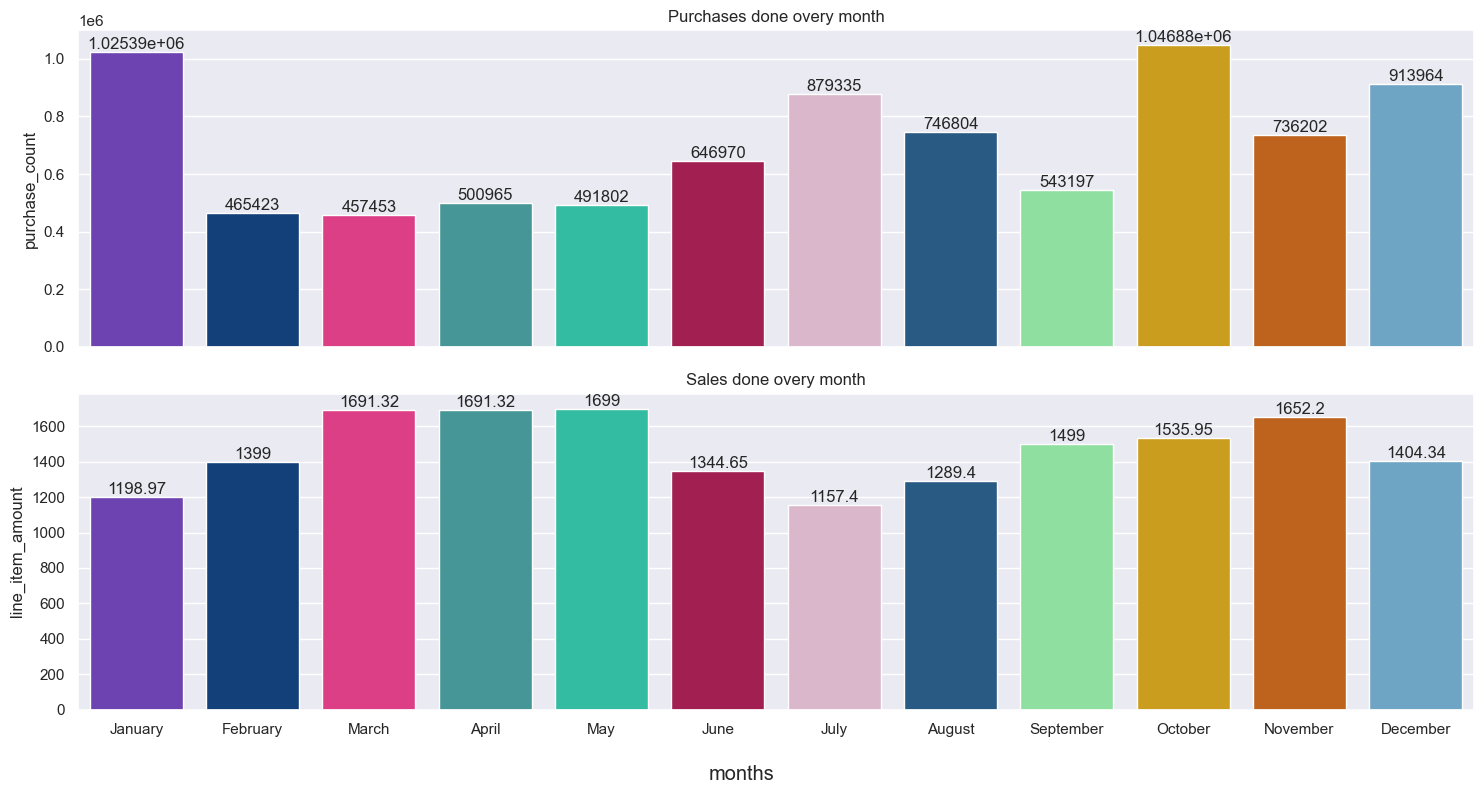

In [43]:
# number of purcheses made each month
purchases_on_each_month = pd.DataFrame(total.groupby(['month'])['month'].count()).rename(columns={'month':'purchase_count'}).reset_index()

# average sales on each month
sales_on_months = total.groupby(['month'])['line_item_amount'].median().reset_index()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,8),sharex=True)
barplot(data=purchases_on_each_month,x='month',y='purchase_count',ax=ax1,order=month_order,title='Purchases done overy month')

barplot(data=sales_on_months,x='month',y='line_item_amount',ax=ax2,order=month_order,title='Sales done overy month')
fig.supxlabel('months')

fig.tight_layout()

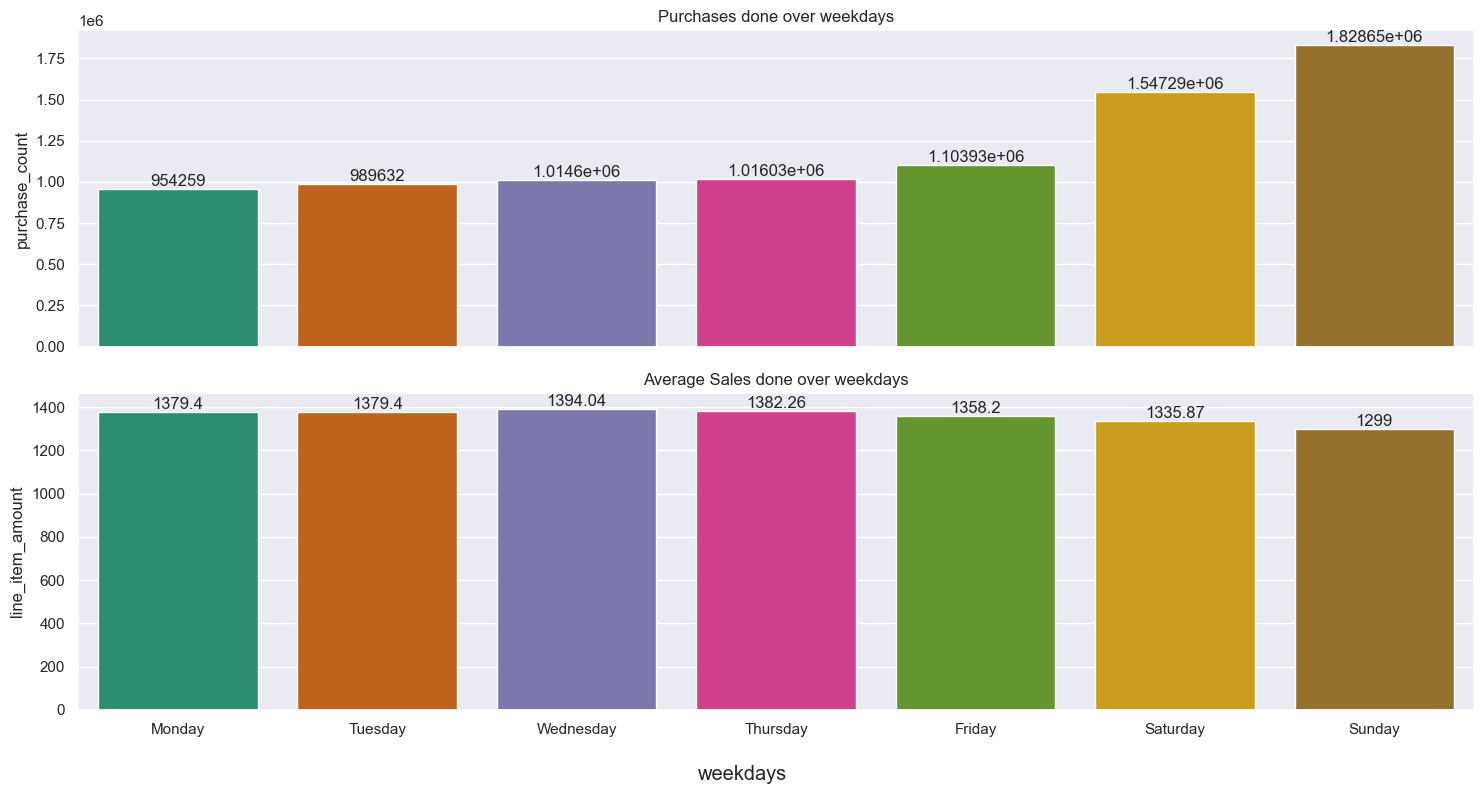

In [44]:
# What are the busiest shopping times of the day or week?
purchases_on_weekdays = pd.DataFrame(total.groupby(['weekday'])['weekday'].count()).rename(columns={'weekday':'purchase_count'}).reset_index()

# average sales on each weekday
sales_on_weekdays = total.groupby(['weekday'])['line_item_amount'].median().reset_index()

week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,8),sharex=True)
barplot(data=purchases_on_weekdays,x='weekday',y='purchase_count',ax=ax1,order=week_order,palette=qual_colors1,title='Purchases done over weekdays')

barplot(data=sales_on_weekdays,x='weekday',y='line_item_amount',ax=ax2,order=week_order,palette=qual_colors1,title='Average Sales done over weekdays')
fig.supxlabel('weekdays')

fig.tight_layout()

In [45]:
# Which products are most buyed on each year
yearly_most_buyed = total[(total['product']!='Unknown')].groupby(['year','product'])['product'].count().sort_values(ascending=False)
yearly_most_buyed[:10]

year  product               
2022  MENS SHIRT                846856
2019  MENS SHIRT                588494
2021  MENS SHIRT                551088
2020  MENS SHIRT                420666
2022  MENS TROUSER WITH BELT    362136
2018  MENS SHIRT                299252
2022  CTRIMS                    275206
2019  MENS TROUSER WITH BELT    270771
2021  MENS TROUSER WITH BELT    236944
2019  CARRY BAG                 234958
Name: product, dtype: int64

In [46]:
# Which products are most buyed on each month and weekday
monthly_most_buyed = total[(total['product']!='Unknown')].groupby(['month','weekday','product'])['product'].count().sort_values(ascending=False)
monthly_most_buyed[:10]

month     weekday   product   
January   Sunday    MENS SHIRT    80751
October   Sunday    MENS SHIRT    73653
January   Saturday  MENS SHIRT    69099
October   Saturday  MENS SHIRT    65622
July      Sunday    MENS SHIRT    64139
August    Sunday    MENS SHIRT    58776
December  Sunday    MENS SHIRT    58139
July      Saturday  MENS SHIRT    54972
December  Saturday  MENS SHIRT    54725
August    Saturday  MENS SHIRT    51285
Name: product, dtype: int64

## **Store Performance**

C:\Users\PC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == "":


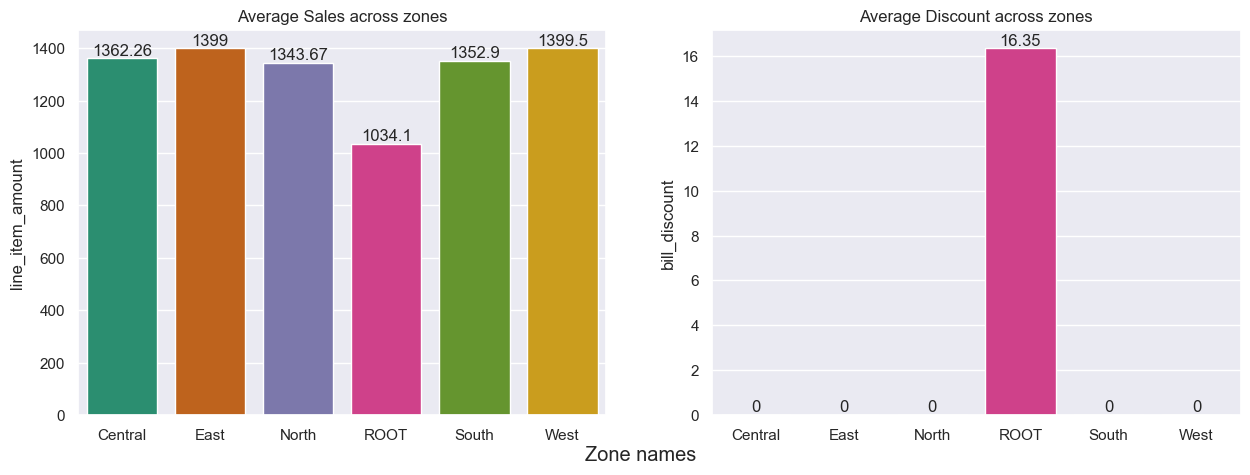

In [47]:
#  How does store performance vary by zone?
zones_sales_mean = total.groupby(['zone_name'])['line_item_amount'].median().reset_index()
zones_discount_mean = total.groupby(['zone_name'])['bill_discount'].median().reset_index()

fig,(ax1,ax2) = plt.subplots(1,2,sharex=True,figsize=(15,5))

barplot(data = zones_sales_mean , x='zone_name',y='line_item_amount',ax=ax1,palette=qual_colors1,title='Average Sales across zones')

barplot(data = zones_discount_mean ,x='zone_name',y='bill_discount',ax=ax2,palette=qual_colors1,title='Average Discount across zones')

fig.supxlabel('Zone names')
fig.show()

C:\Users\PC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


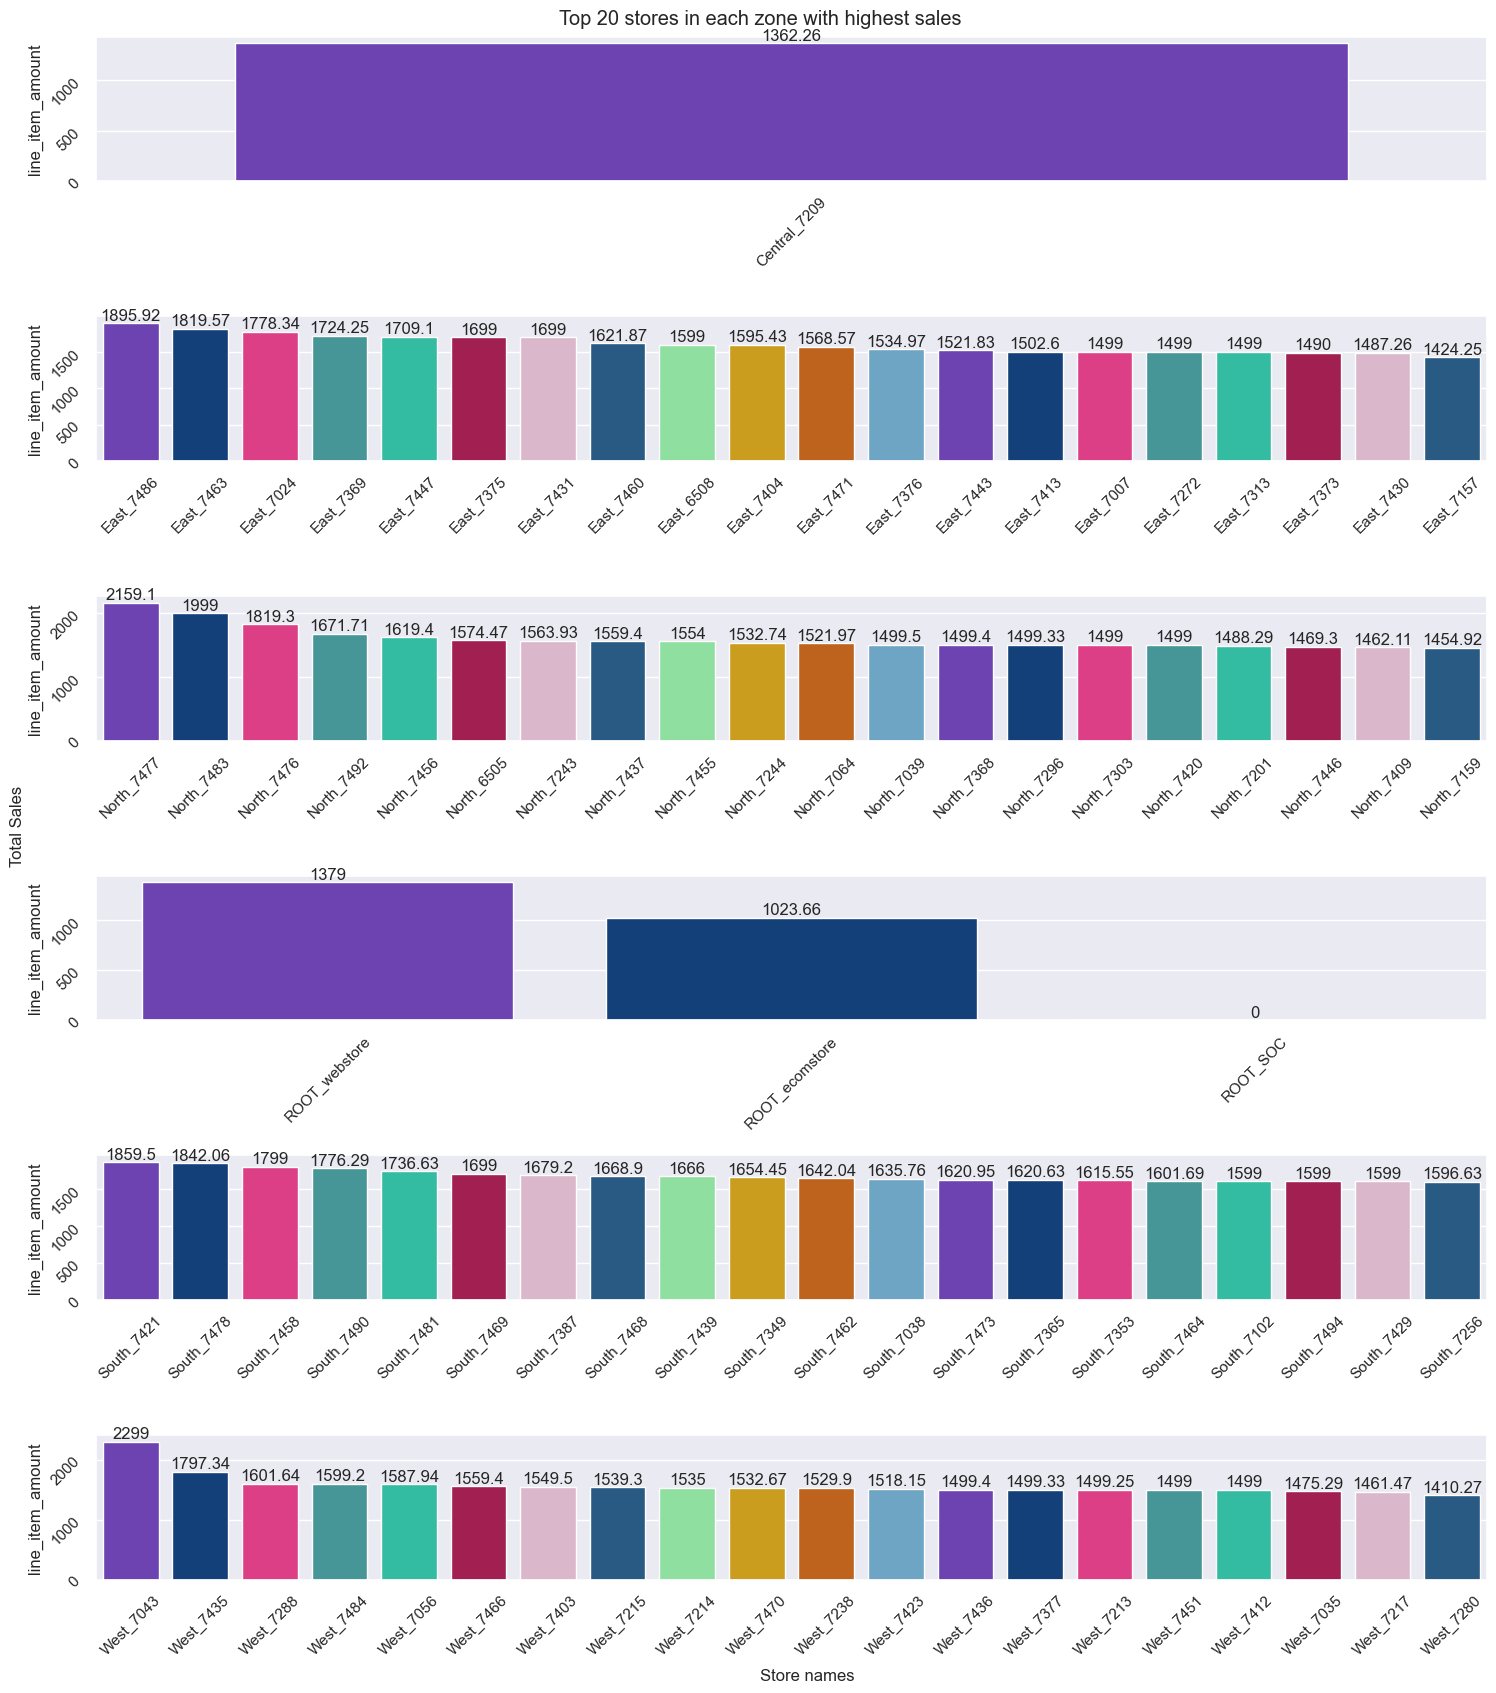

In [48]:
# stores from each zones with highest sales
zone_and_store_sales = total.groupby(['zone_name','store_name'])['line_item_amount'].median().reset_index()

# sales in different zones stores
zones = zone_and_store_sales.zone_name.unique().tolist()

fig , ax = plt.subplots(6,figsize=(15,17))

for i,zone in enumerate(zones):
    stores_with_highest_sales = zone_and_store_sales[zone_and_store_sales['zone_name']==zone].sort_values('line_item_amount',ascending=False)[:20]

    bar = barplot(data = stores_with_highest_sales , x='store_name',y='line_item_amount',ax=ax[i],labelrotation=45,title='')

fig.suptitle('Top 20 stores in each zone with highest sales')
fig.tight_layout()

fig.text(0.00, 0.5, 'Total Sales', va='center', rotation='vertical')
fig.text(0.5, 0, 'Store names', va='center')

fig.show()

## **Apriori Algorithm for product recommendations**


In [49]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Preprocess the data: Group by 'bill ID' and 'item description' to create a transaction-wise list
basket = (total
          .groupby(['bill_id', 'description'])['line_item_amount']
          .sum().unstack().reset_index().fillna(0)
          .set_index('bill_id'))

# Convert the units to 1s and 0s
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate the rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Function to recommend items based on items in the shopping cart
def recommend_products(basket, rules):
    # Your basket is a list of items
    basket_set = set(basket)
    recommendations = []

    # Filter rules with a matching antecedent
    for idx, rule in rules.iterrows():
        if basket_set.issubset(rule['antecedents']):
            recommendations.extend(rule['consequents'] - basket_set)

    return set(recommendations)

# Example usage
current_basket = ['MSH ITMSH00617 Slim LS Pine XL', 'MSW ITMSW00017 LS Regular Brown M']  # replace with actual item descriptions
recommendations = recommend_products(current_basket, rules)
print(f"Based on the current basket, we recommend: {recommendations}")


ModuleNotFoundError: No module named 'mlxtend'